In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd
df = pd.read_csv("teleco.csv")
profile = ProfileReport(df)
profile.to_file("TelecoProfileReport.html")


Dimensiones: (7032, 20)

Columnas: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Valores faltantes por columna:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Duplicados: 22

Rangos y valores atípicos potenciales:
gender: min=0, max=1, negativos=0
SeniorCitizen: min=0, max=1, negativos=0
Partner: min=0, max=1, negativos=0
Dep

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


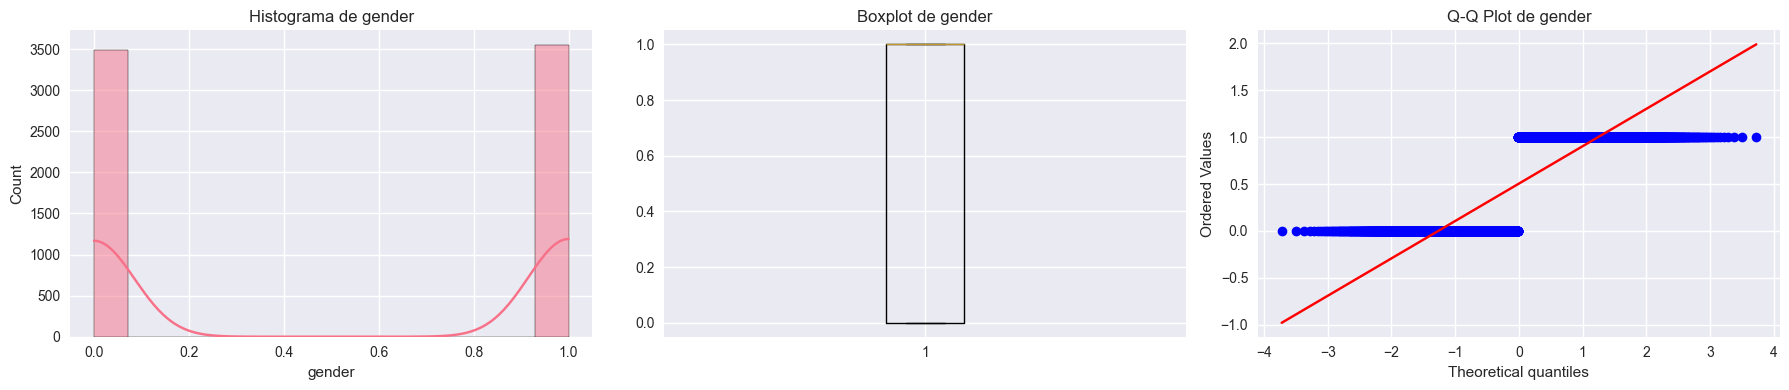

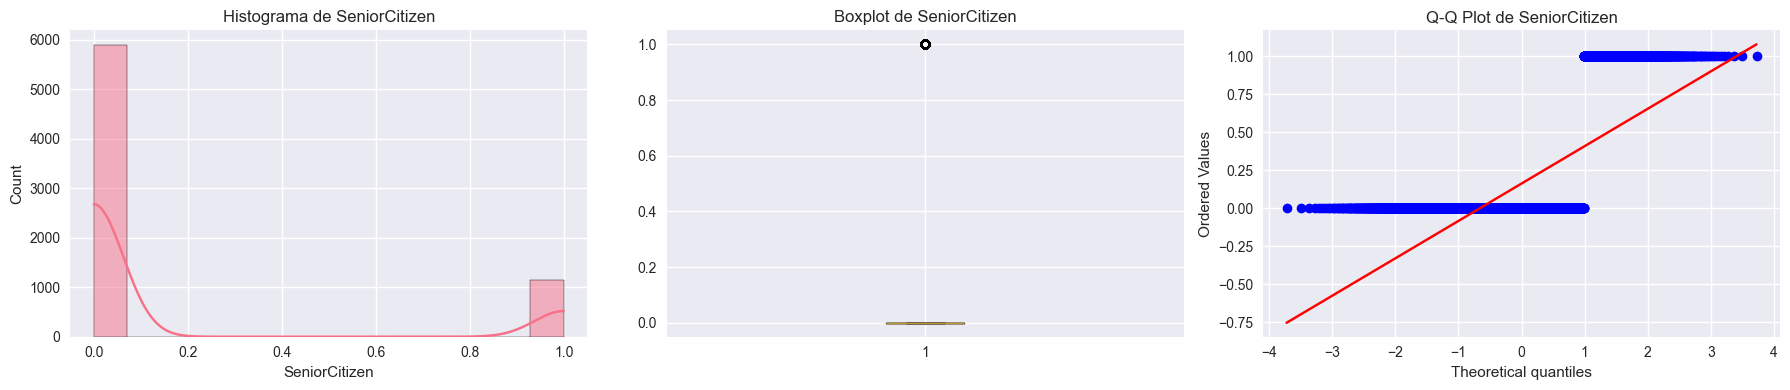

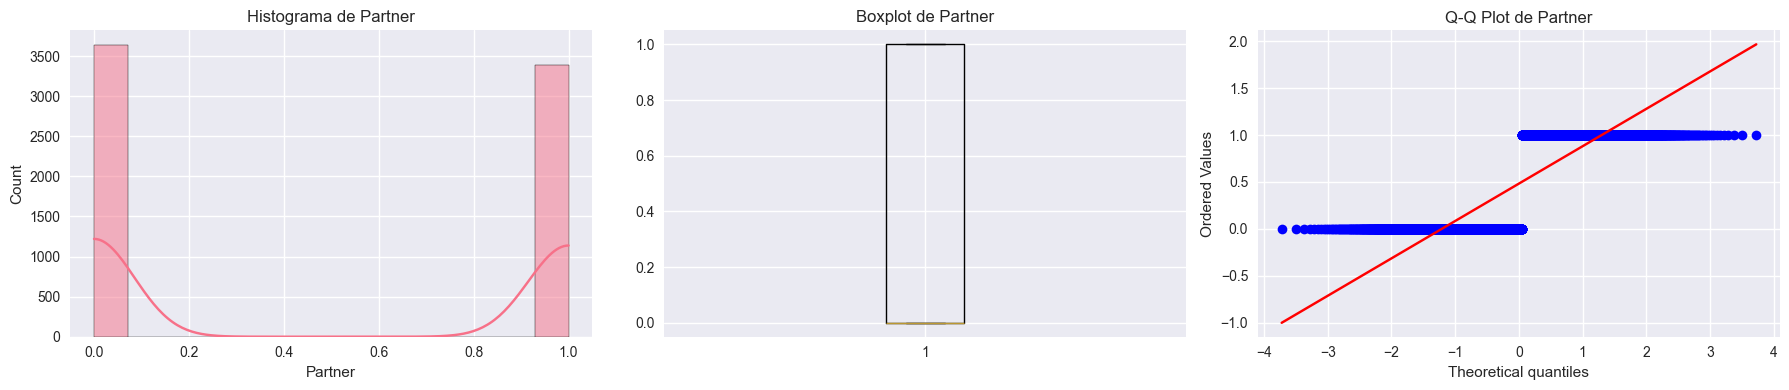

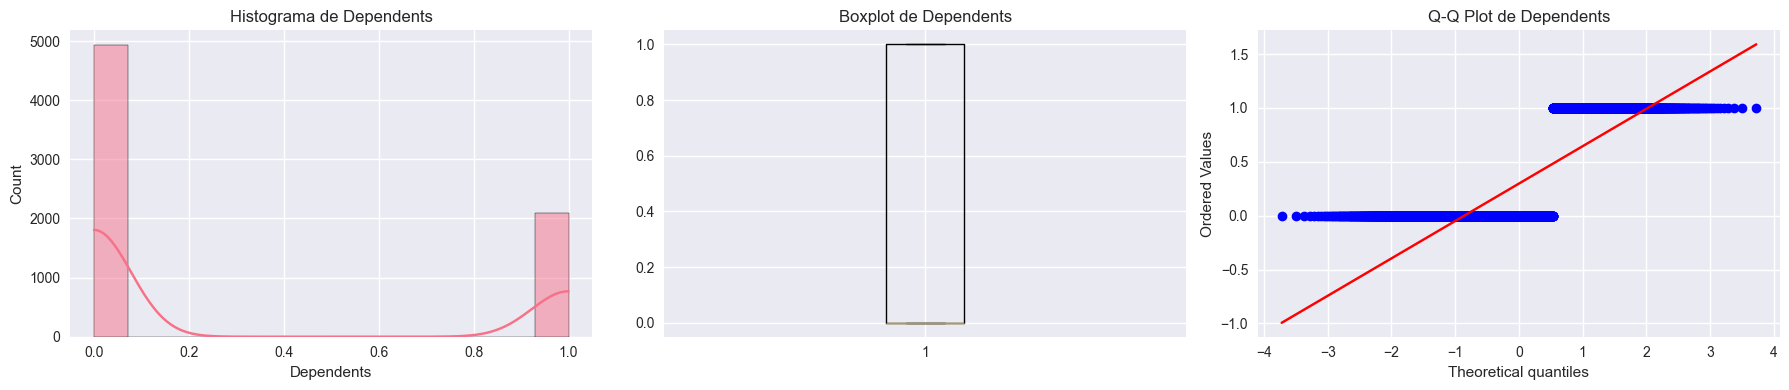

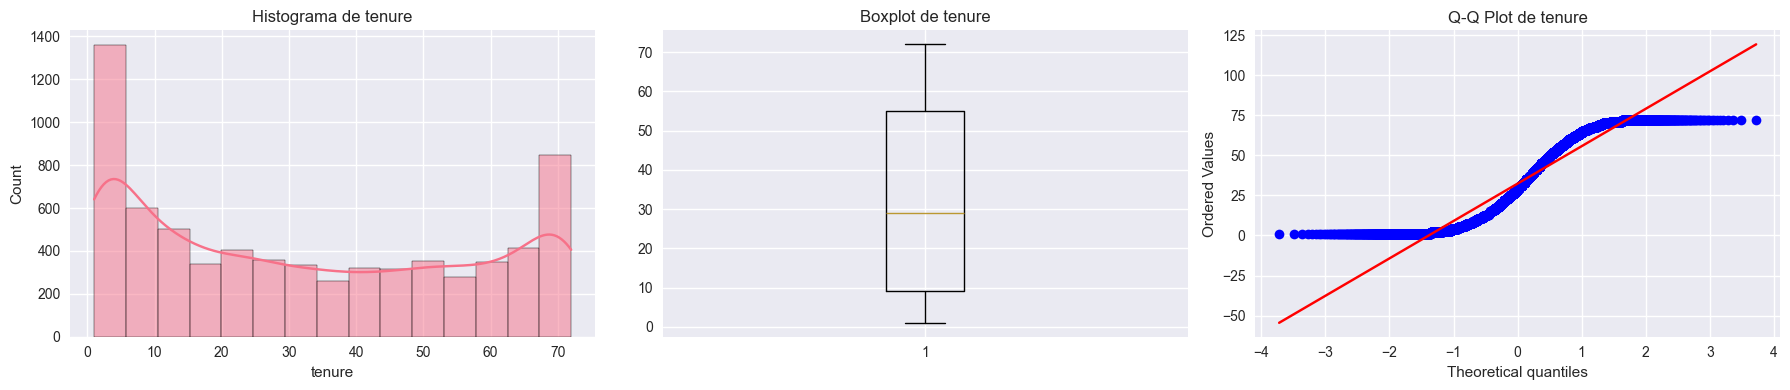

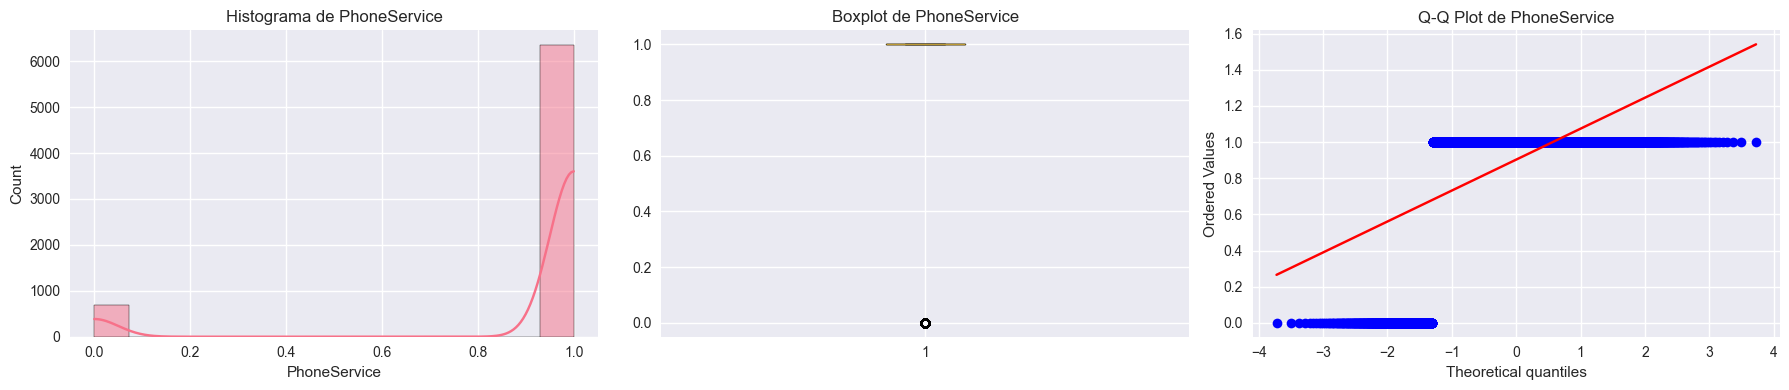

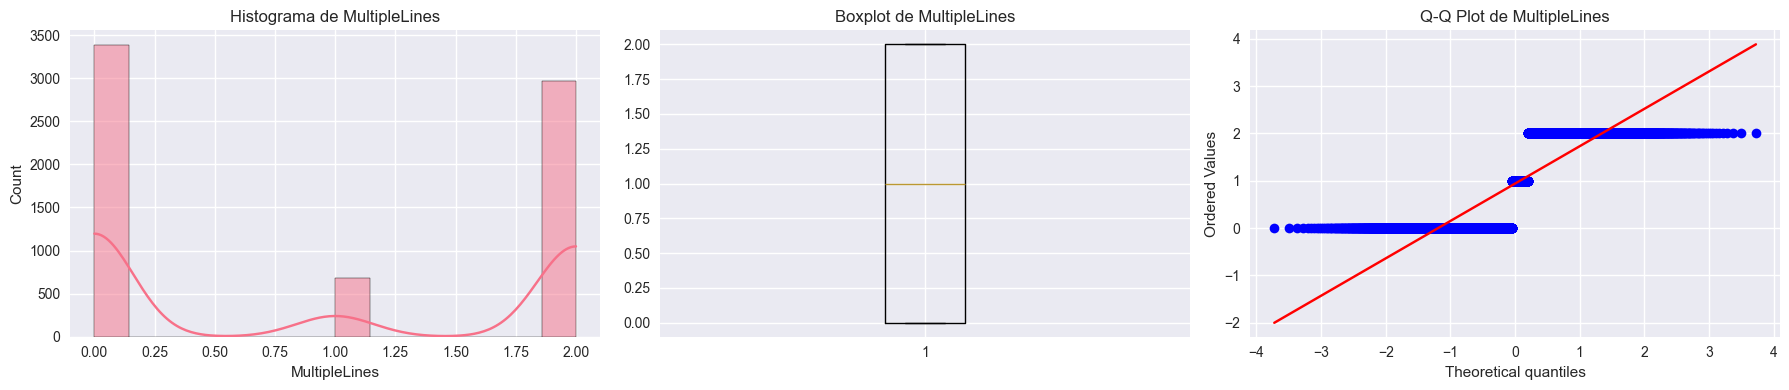

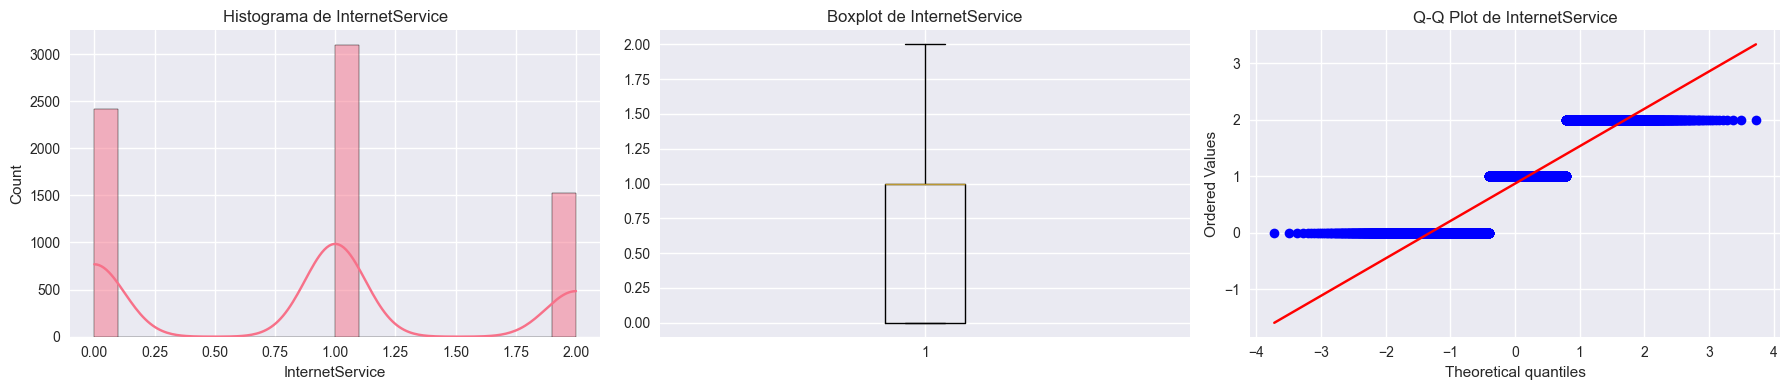

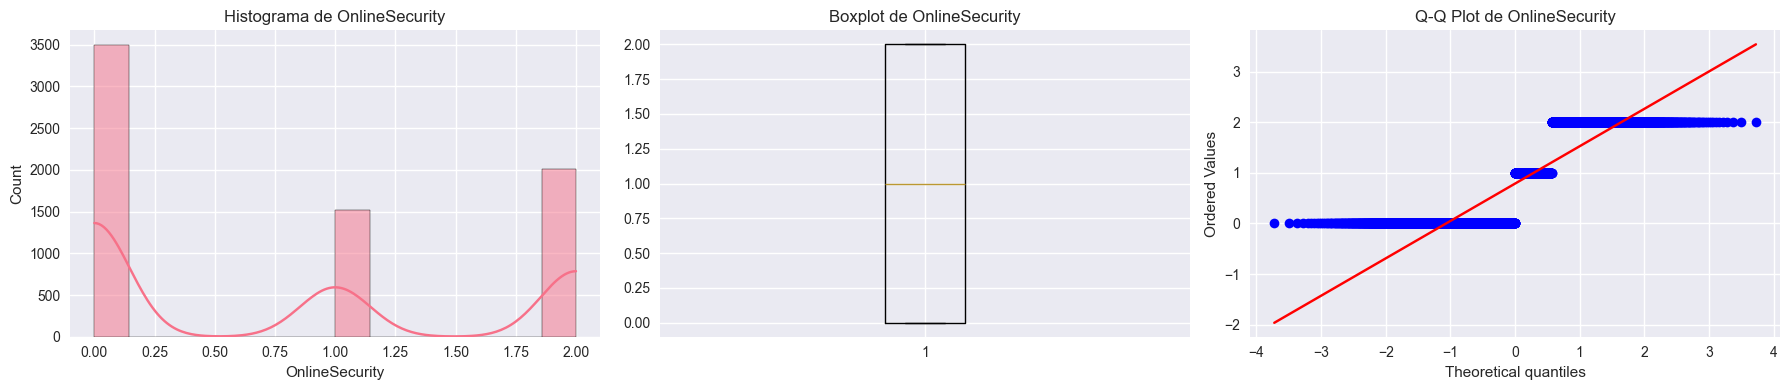

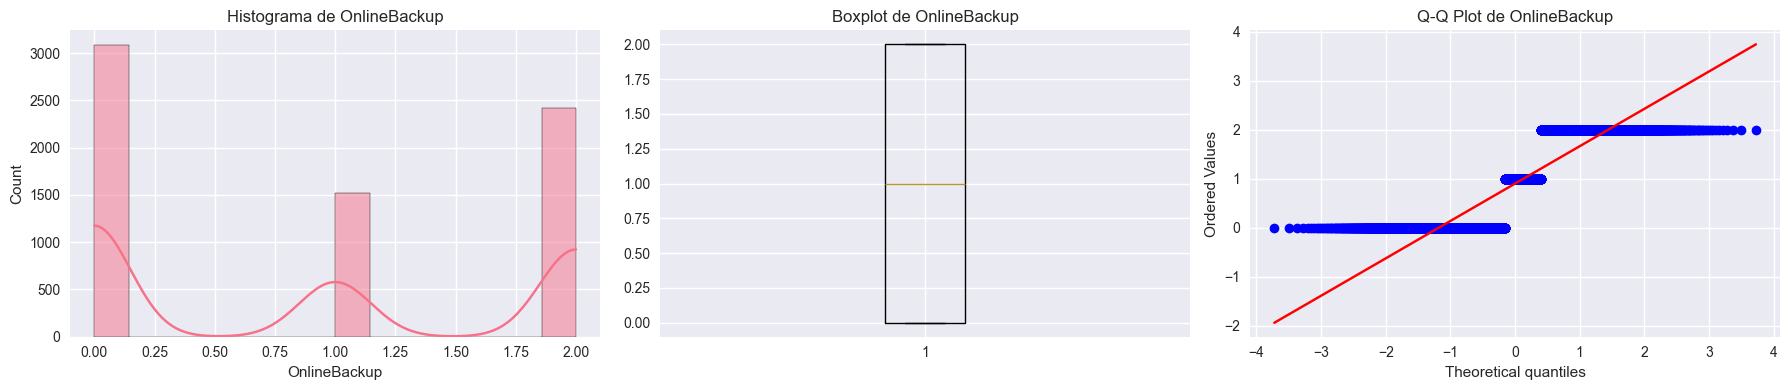

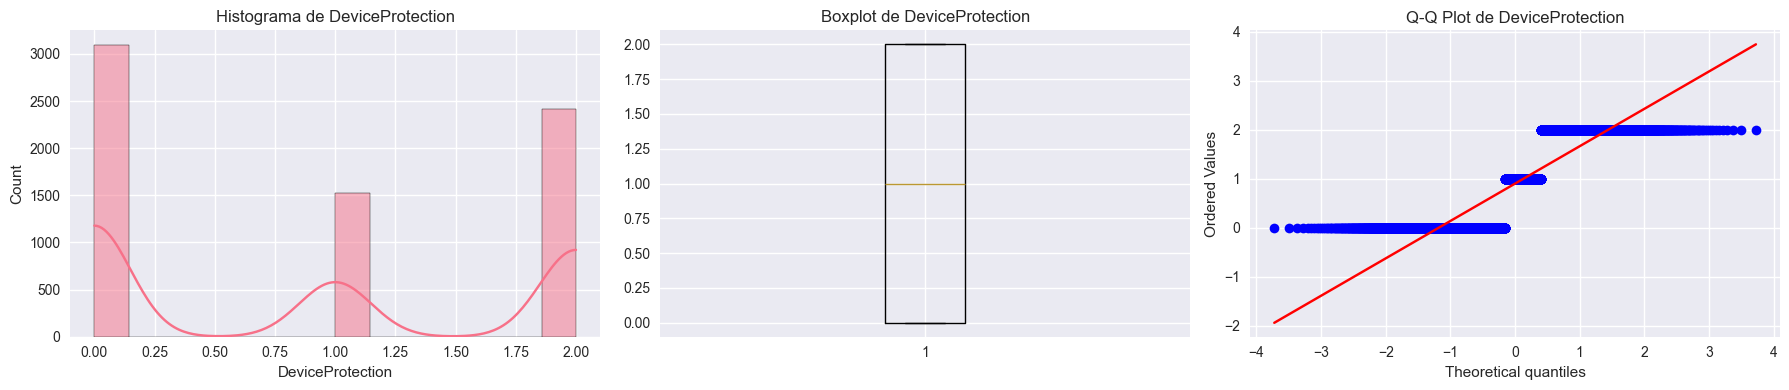

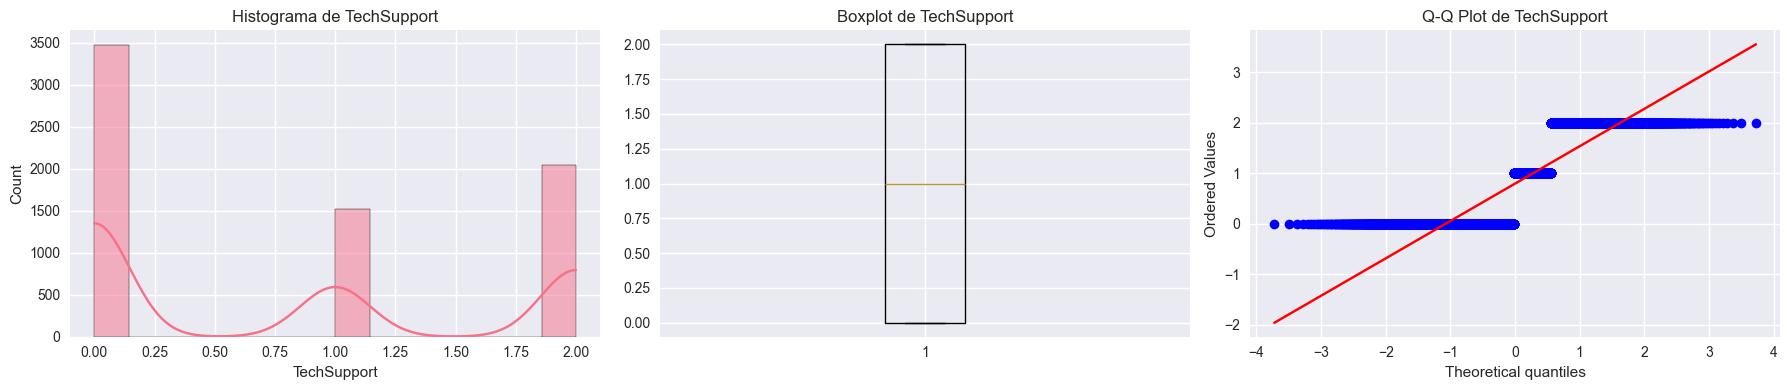

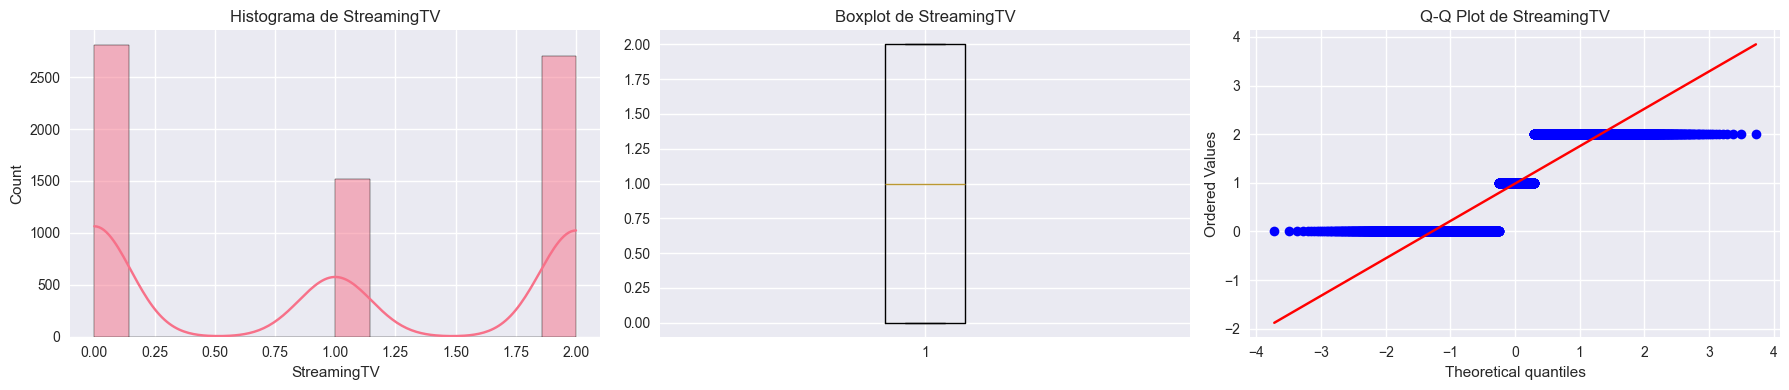

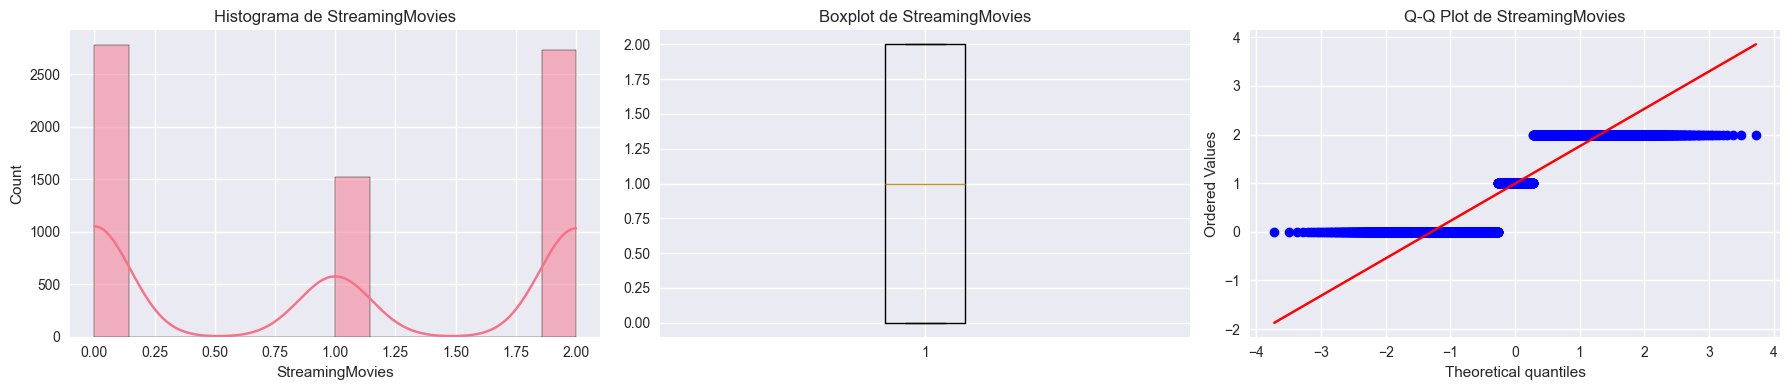

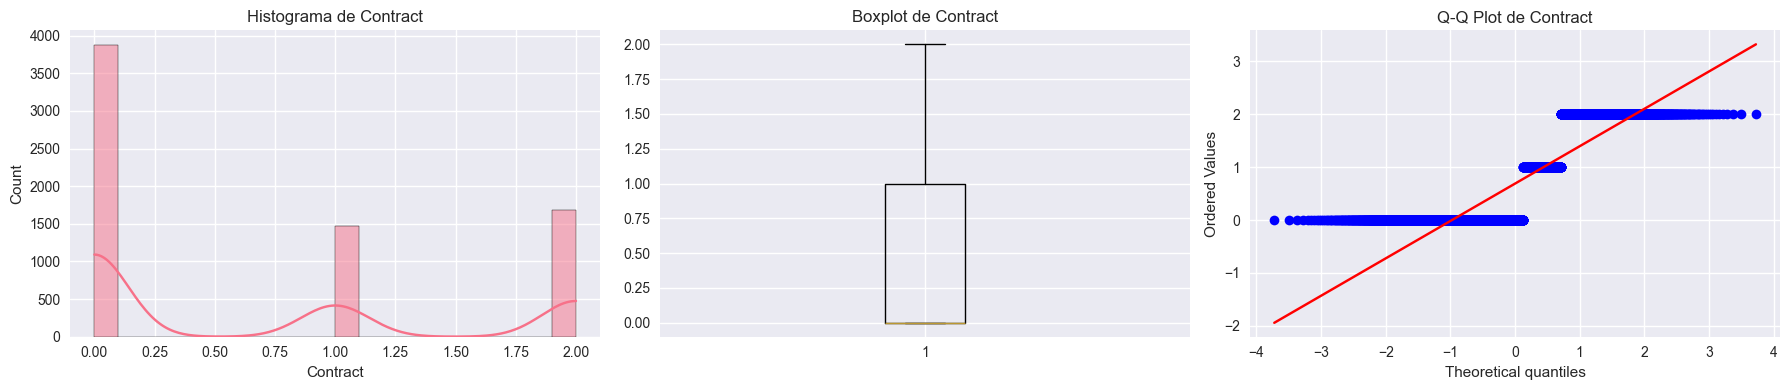

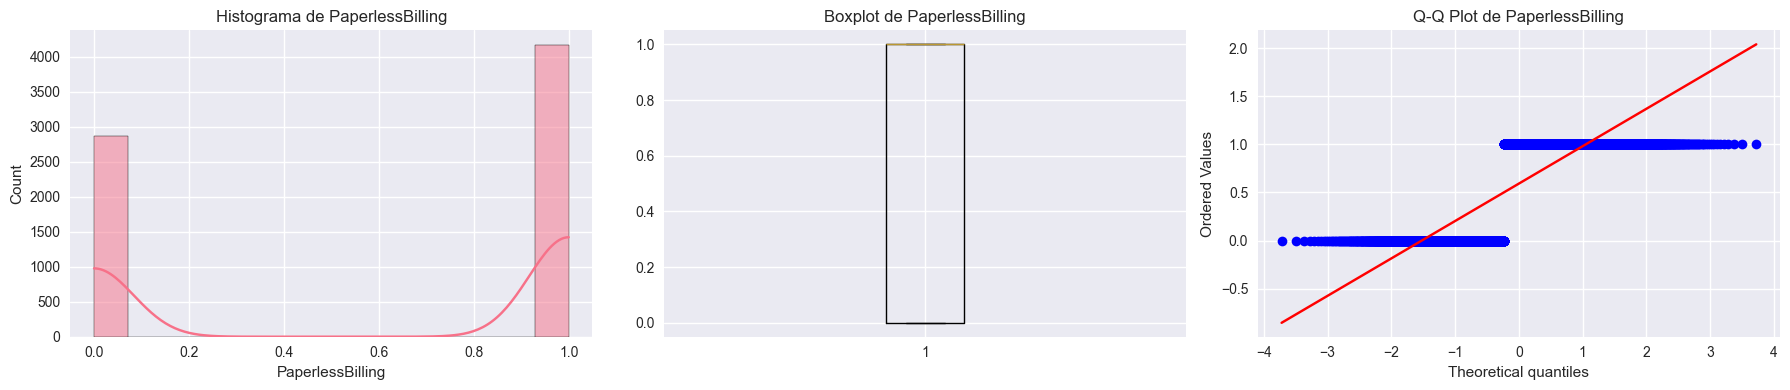

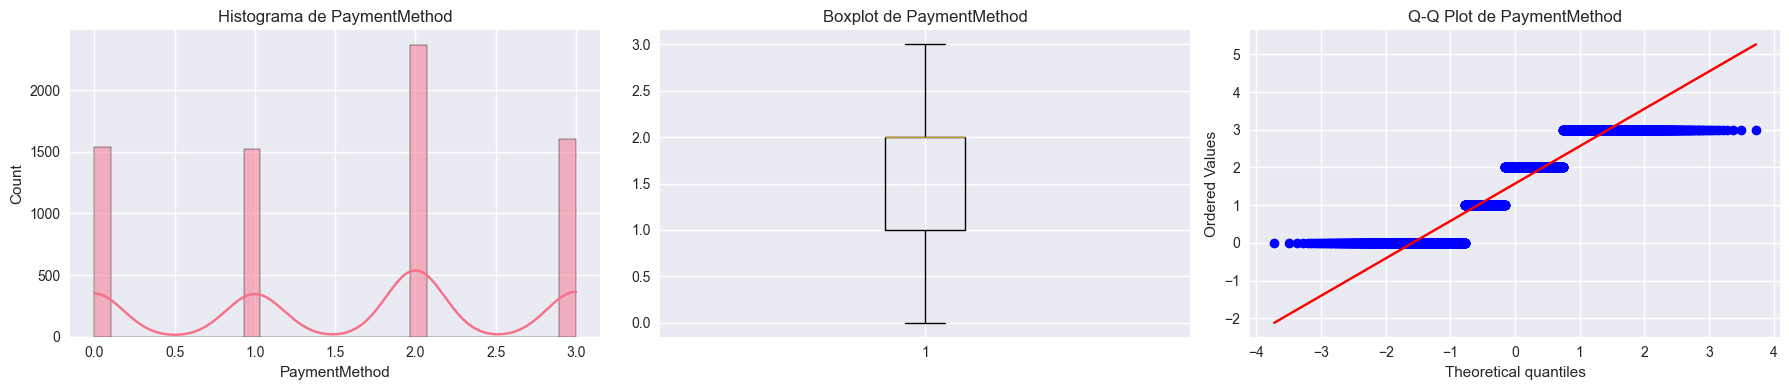

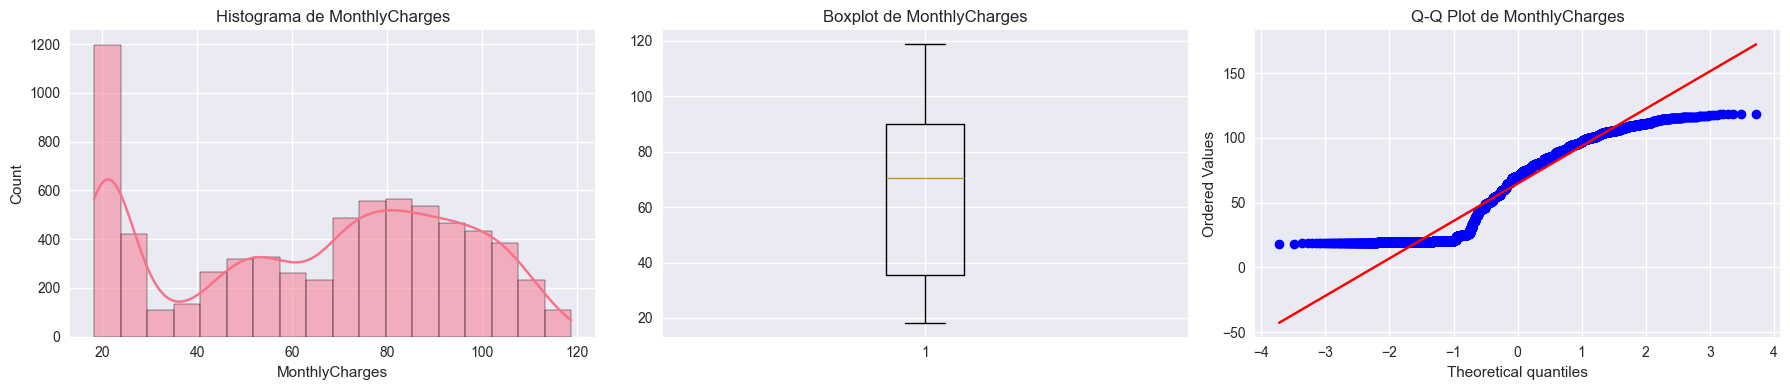

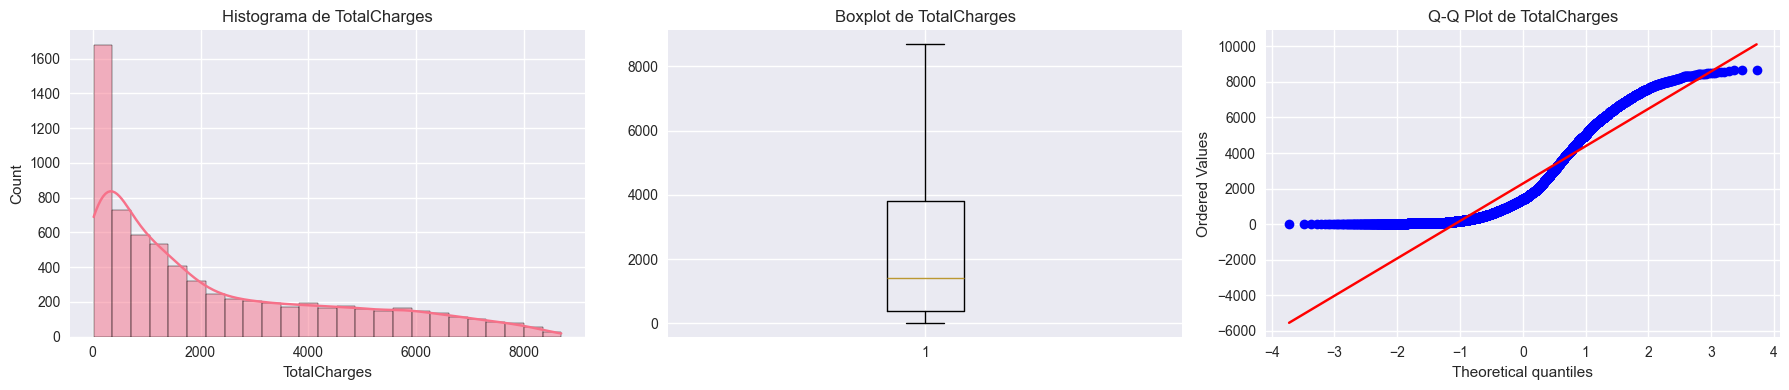

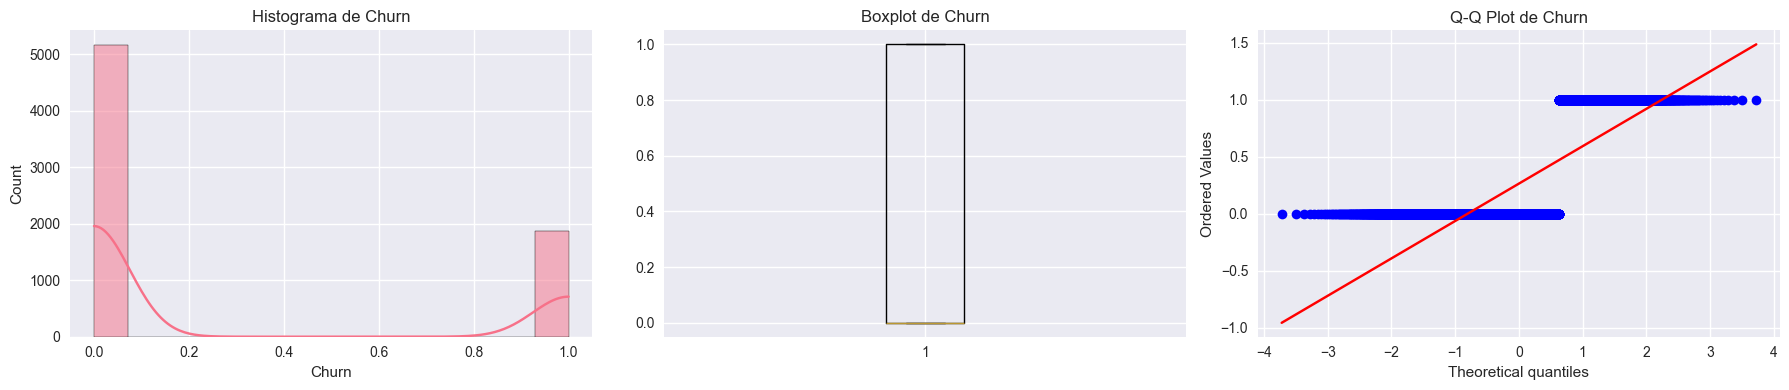


Correlaciones Pearson:


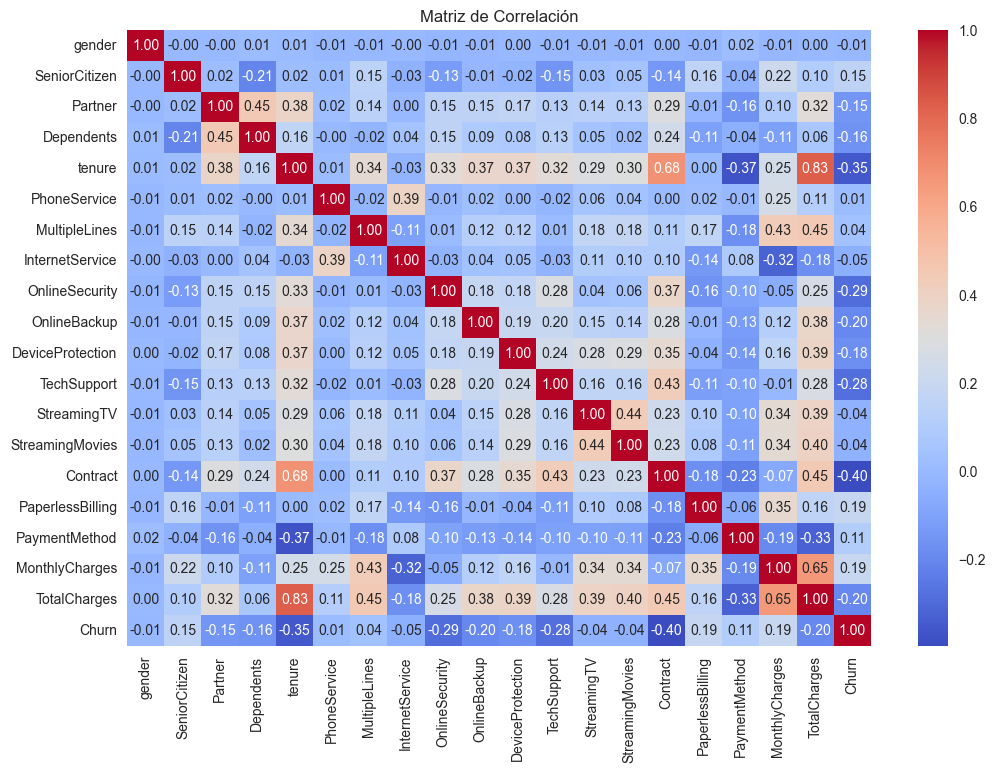

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")

# Configuración visual
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
np.random.seed(42)

# Cargar el dataset limpio
df = pd.read_csv("teleco_clean.csv")
df.columns = df.columns.str.strip()

# Paso 1: Dimensiones y columnas
print(f"\nDimensiones: {df.shape}")
print(f"\nColumnas: {list(df.columns)}")

# Paso 2: Evaluación de calidad de datos
print("\nValores faltantes por columna:")
print(df.isnull().sum())

print("\nDuplicados:", df.duplicated().sum())

# Consistencia de variables numéricas
print("\nRangos y valores atípicos potenciales:")
for col in df.select_dtypes(include=np.number).columns:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, negativos={(df[col]<0).sum()}")

# Paso 3: Estadísticos descriptivos
display(df.describe())

# Paso 5: Visualizaciones univariadas
for col in df.select_dtypes(include=np.number).columns:
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f"Histograma de {col}")
    axs[1].boxplot(df[col].dropna())
    axs[1].set_title(f"Boxplot de {col}")
    stats.probplot(df[col], dist="norm", plot=axs[2])
    axs[2].set_title(f"Q-Q Plot de {col}")
    plt.tight_layout()
    plt.show()

# Paso 6: Análisis de correlaciones
print("\nCorrelaciones Pearson:")
corr_matrix = df.select_dtypes(include=np.number).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


## Conclusiones del Análisis Exploratorio (EDA)

A continuación se resumen los hallazgos más relevantes obtenidos del análisis exploratorio.

### 1. **Calidad de los datos**
- No se detectaron valores nulos tras el preprocesamiento.
- No hay duplicados.
- Las columnas categóricas han sido correctamente codificadas como variables numéricas.
- Algunas variables presentan alta concentración en una sola categoría (e.g., `PhoneService`, `SeniorCitizen`).

---

### 2. **Distribución de variables**
- Variables como `gender`, `Partner`, `Dependents`, `PhoneService` o `SeniorCitizen` tienen distribución binaria muy marcada.
- `tenure`, `MonthlyCharges` y `TotalCharges` muestran una distribución más continua y variada, aunque con cierta asimetría.
- `MonthlyCharges` y `TotalCharges` presentan valores extremos (outliers) que pueden afectar modelos sensibles.

---

### 3. **Correlaciones destacadas**
- `tenure` tiene una **correlación negativa con `Churn` (-0.35)**: los clientes que llevan más tiempo son menos propensos a abandonar.
- `Contract` es la variable más predictiva con `Churn` (**correlación de -0.40**): los contratos de mayor duración ayudan a la retención.
- `OnlineSecurity`, `TechSupport` y `TotalCharges` también presentan correlaciones relevantes con `Churn`.

---

### 4. **Outliers y normalidad**
- Se detectan outliers principalmente en `MonthlyCharges` y `TotalCharges`.
- La mayoría de las variables no sigue una distribución normal.

### 5. **Recomendaciones para modelado**
- Aplicar escalado (`StandardScaler`) a variables continuas como `tenure`, `MonthlyCharges`, `TotalCharges`.
- Considerar la eliminación o tratamiento de outliers si se utilizan modelos sensibles (e.g., regresión).
- Evaluar colinealidad entre `TotalCharges`, `MonthlyCharges` y `tenure`.
- Tener en cuenta el posible desequilibrio de clases en `Churn` al entrenar modelos de clasificación.

---